In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.style.use("fivethirtyeight")

path = ""

In [19]:
# Uncomment cell if using Google Colab

from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/My Drive/csc-461-final-project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
Statewide = pd.read_csv(path + "data/Statewide.csv")
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2,0,0
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3,1,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0,1,3
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
Statewide_target = Statewide["TGT STATEWIDE PRIMARY"]
Statewide = Statewide.drop(["TGT STATEWIDE PRIMARY", "TGT PARTY AFFILIATION"], axis = 1)

In [23]:
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0


In [24]:
Statewide_target.head()

0    0
1    0
2    1
3    1
4    0
Name: TGT STATEWIDE PRIMARY, dtype: int64

In [25]:
%pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True


### Baseline models

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Statewide, Statewide_target, test_size = .50, stratify = Statewide_target)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Train features shape: (408148, 13)
Test features shape: (408149, 13)


In [28]:
X_test.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8
574726,27,2909,1,1960,0,1,0,0,1,0,0,0,0
120406,27,2909,2,1960,0,0,0,0,0,0,0,0,0
325928,38,2895,3,1950,0,1,0,0,1,0,0,0,0
343222,10,2822,1,1943,0,1,0,0,0,0,0,0,0
193582,36,2893,1,1991,0,1,0,0,1,0,0,0,0


In [29]:
wandb.init()

In [30]:
def conventionalWisdomClassifier(X):
  preds = []
  probs = []
  for index, row in X.iterrows():
    electionCount = row["ELECTION 3"] + row["ELECTION 4"] + row["ELECTION 5"]
    if electionCount == 3:
      preds.append(1)
    else:
      preds.append(0)
    if electionCount == 3:
      probs.append(1)
    elif electionCount == 2:
      probs.append(0.6666)
    elif electionCount == 1:
      probs.append(0.3333)
    else:
      probs.append(0)
  return (preds, probs)


wisdom_preds = conventionalWisdomClassifier(X_test)[0]
wisdom_probs = conventionalWisdomClassifier(X_test)[1]

print("AUC-PR {}".format(sklearn.metrics.average_precision_score(y_test, wisdom_probs)))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

print('\nF1 Score: {}'.format(
    f1_score(y_test, wisdom_preds, average = "weighted")))
print('Precision: {}'.format(
    precision_score(y_test, wisdom_preds, average = "weighted")))
print('Recall: {}'.format(
    recall_score(y_test, wisdom_preds, average = "weighted")))
print('Accuracy: {}'.format(
    accuracy_score(y_test, wisdom_preds)))
print('MCC: {}'.format(
    matthews_corrcoef(y_test, wisdom_preds)))

AUC-PR 0.44390866925168376

F1 Score: 0.8181572380771258
Precision: 0.840305942649367
Recall: 0.8543448593528343
Accuracy: 0.8543448593528343
MCC: 0.34098589426633685


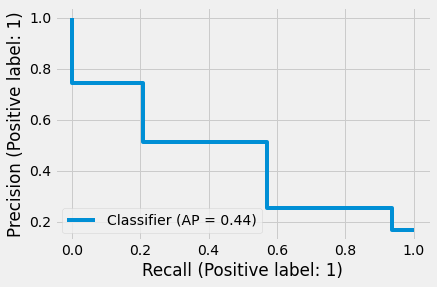

In [31]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, wisdom_probs)

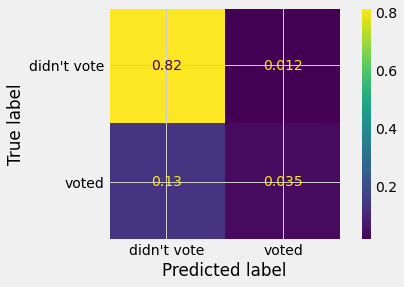

In [32]:
cm = confusion_matrix(y_test, wisdom_preds, normalize = "all", labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["didn't vote", "voted"])
wandb.sklearn.plot_confusion_matrix(y_test, wisdom_preds, ["didn't vote", "voted"]) 
disp.plot()
plt.show()

In [33]:
wandb.finish()